In [1]:
#importing all the necessary libraries

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# EDA

In [3]:
#reading train dataset
df_train = pd.read_csv('/content/drive/MyDrive/data/ida_2016_training_set_update.csv')

#replacing string 'na' with float np.NaN
df_train = df_train.replace('na', np.NaN)
df_train.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,NaN,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,NaN,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,NaN,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,NaN,0,NaN,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,NaN,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


>The data set is enitrely numerical. 
The data set providers told that the columns are either numerical counters or histogram open ended bin counters.
Identifying which columns are histogram bin counters.

In [4]:
import re

total_columns = np.array(df_train.columns)        #storing all the columns of the dataframe in an array

bin_columns = []
match_list = []

pattern = re.compile(r"([a-z]{2})\_00[1-9]")      #finding histogram columns which has 001 to 009 subscripts
for s in total_columns:
    match = pattern.findall(s)                    #findall returns list of the matched pattern
    if match and match not in match_list:         #checking whether the return pattern is null or not and if it is already padded to the list or not     
        match_list.append(match)                  #match_list contains the histogram names
        
match_list =list(np.array(match_list).flatten())    
print('the names of the histograms are {}\n'.format(match_list))

for l in match_list:
    for s in total_columns:
        x = re.compile(l+'\_[0-9]{3}').findall(s) #finding the all the columns for each subscript in the match_list
        if x:
            bin_columns.extend(x)                #bin_columns contains all the histogram bin counters present in the data
        
print('The histogram bin counter columns present in the train data set are \n{}'.format(bin_columns))

the names of the histograms are ['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']

The histogram bin counter columns present in the train data set are 
['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']


1. There are 7 different histograms.
2. Each histogram have 10 bin counters.
3. There are total 70 histogram bin features.

>Distribution of classes in the train data set

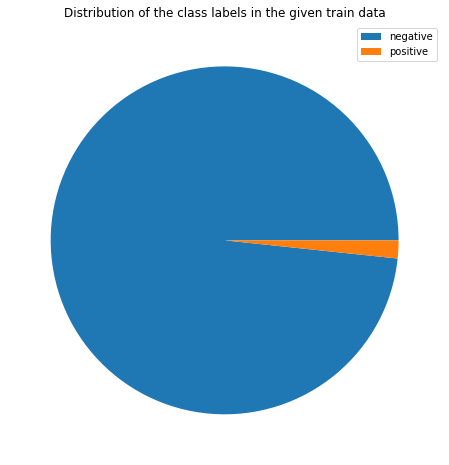

In [5]:
plt.figure(figsize=(10,8))
plt.pie(df_train['class'].value_counts())
plt.title('Distribution of the class labels in the given train data')
plt.legend(['negative', 'positive'])
plt.show()

1. There are about 60,000 training points with 170 features in the given train data.
2. There are about 1000 positive classes indicating APS failure and 59000 negative classes indicating non APS-failure.
3. Given data set is highly imbalanced, skewed towards negative class {1}.

In [6]:
# storing target variables as labels from the train data
labels = df_train['class']

# numeric labeling of classes for negative class as '0' and for positvie class as '1'
labels = labels.map({'neg': 0, 'pos': 1})

In [7]:
#dropping class labels from the train data to generate feature data 
train_data = df_train.drop(['class'], axis=1)

In [8]:
#splitting given train data into X_train and X_cv for the validation purpose
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(train_data, labels, stratify=labels, test_size=0.2, random_state = 8)

In [9]:
print('the shape of the X_train data is ',X_train.shape)
print('the sahpe of the X_cv data is ', X_cv.shape)

the shape of the X_train data is  (48000, 170)
the sahpe of the X_cv data is  (12000, 170)


>Percentage of missing data in the train data set

In [10]:
#creating a dataframe for counting no. of rows with full values
not_missing_rows = pd.DataFrame(X_train.count(axis=1), index= X_train.index, columns=['not_missing'])

#Finding no. of rows which contains total columns values.
not_missing_rows.loc[not_missing_rows['not_missing']==170]

,not_missing
23594,170
57877,170
2721,170
9001,170
29257,170
...,...
32283,170
38883,170
22951,170
18875,170


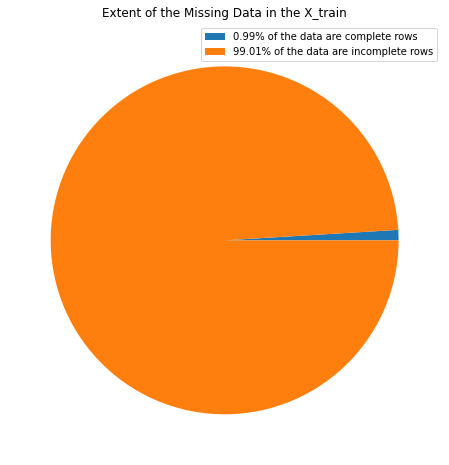

In [11]:
plt.figure(figsize=(10,8))
plt.pie([not_missing_rows.loc[not_missing_rows['not_missing']==170].shape[0], X_train.shape[0]])
plt.title('Extent of the Missing Data in the X_train')
plt.legend(['0.99% of the data are complete rows', '99.01% of the data are incomplete rows'])
plt.show()

In [12]:
#counting no. of missing values for each column in the train dataset
na_count = pd.DataFrame(X_train.isnull().sum(), columns=['missing_count'])

#calculating missing_percentage for each column
na_count['missing_percentage'] = X_train.isnull().sum()/len(X_train)

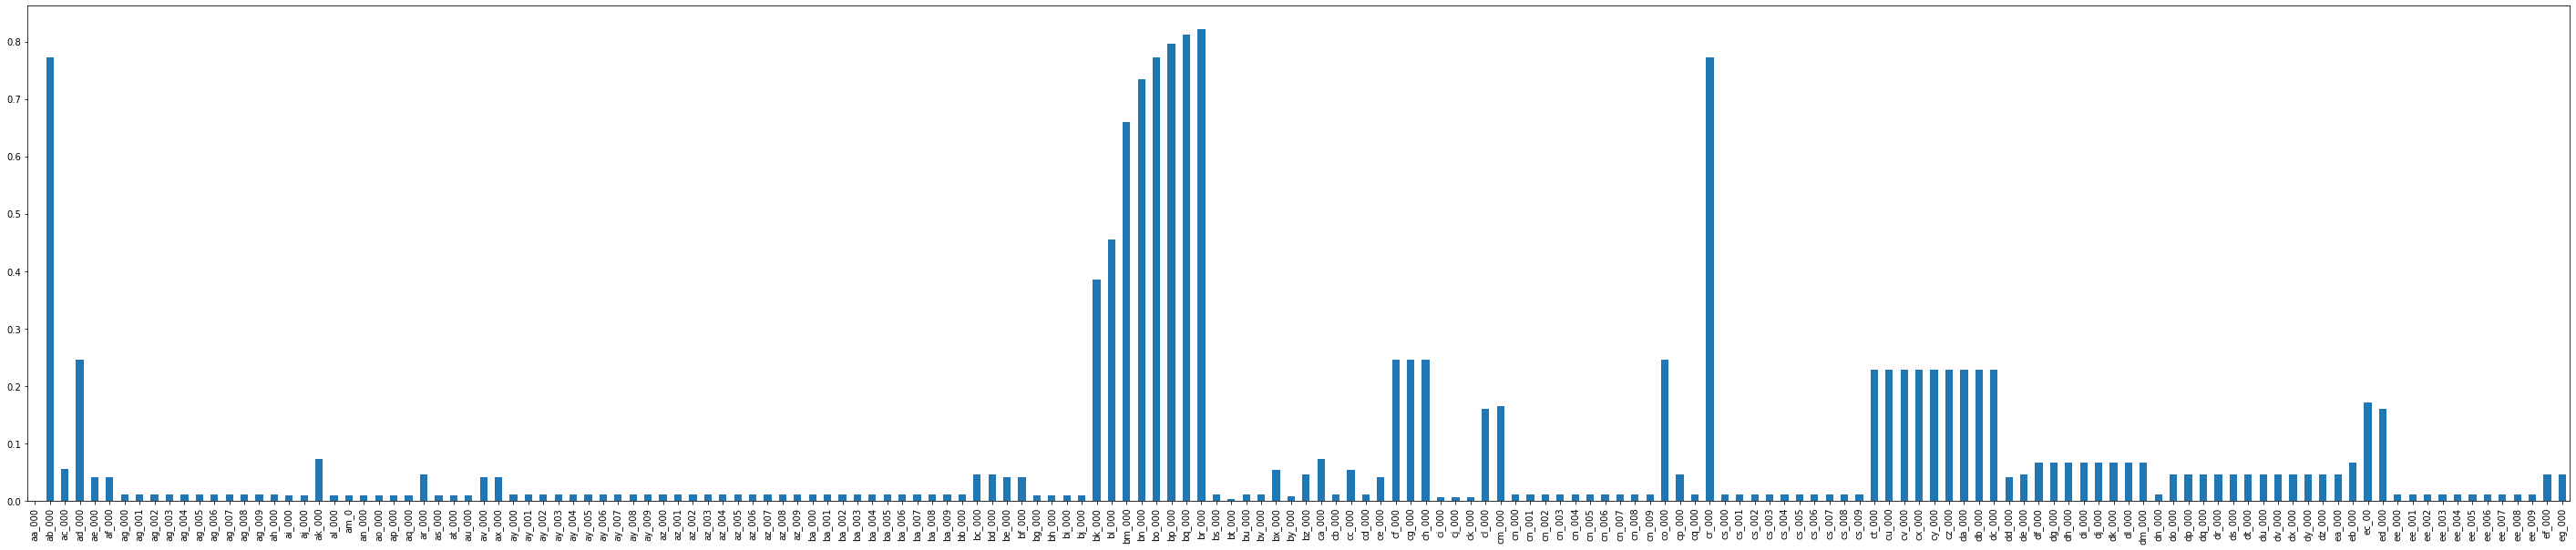

In [13]:
#plotting no. of missing counts
na_count['missing_percentage'].plot.bar(figsize=(50,10))

In [14]:
#finding the features whose missing_percentage is greater than 50%
more_than_fifty = na_count.loc[na_count['missing_percentage'] > 0.50]
more_than_fifty

,missing_count,missing_percentage
ab_000,37038,0.771625
bm_000,31659,0.659563
bn_000,35233,0.734021
bo_000,37095,0.772813
bp_000,38198,0.795792
bq_000,38971,0.811896
br_000,39405,0.820937
cr_000,37038,0.771625


1. There are 8 features whose missing count is greater than 50% of the data points.
2. They may not play any important factor in deciding the class of a instance, hence we discard them.

In [15]:
# Dropping the features where more than fifty percent of the column are missing values
X_train = X_train.drop(more_than_fifty.index, axis=1)
X_cv = X_cv.drop(more_than_fifty.index, axis = 1)

In [16]:
print('after removing the features which contain more than 50% NaN no. of featrues reduced to', len(X_train.columns))

after removing the features which contain more than 50% NaN no. of featrues reduced to 162


>Reading Test data

In [17]:
#reading test data set
df_test = pd.read_csv('/content/drive/MyDrive/data/ida_2016_test_set_update.csv')

#replacing string 'na' with float np.NaN
df_test = df_test.replace('na', np.NaN)
df_test.head()

,id,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1,na,60,0,20,12,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,2,na,82,0,68,40,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,3,na,66002,2,212,112,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,4,na,59816,NaN,1010,936,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,5,na,1814,NaN,156,140,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [18]:
# creating test and discarding the same features from the test data set too.
X_test = df_test.drop(['class', 'id'], axis = 1)
X_test = X_test.drop(more_than_fifty.index, axis=1)

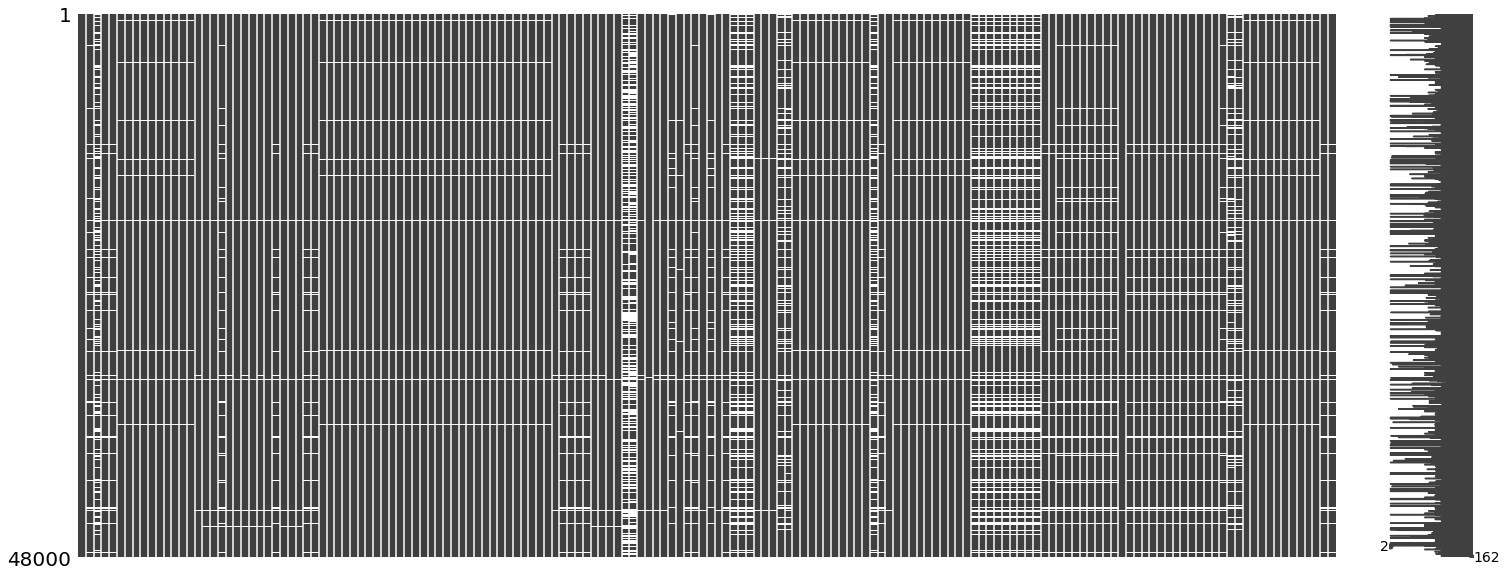

In [19]:
import missingno as msno

msno.matrix(X_train)

1. The missingness is indicated by black and observed values are indicated by white.
2. The observed values are surrounded by missing values without any pattern i.e. arbitrary.

## Imputing the dataset using Multivariate Imputer
## kNN Imputer

### https://www.youtube.com/watch?v=AHBHMQyD75U
### https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/
1. kNN Imputer uses nan_euclidean distance to findout nearest neighbors.
2. The mean of the k nearest neighbors is imputed at the missing value.
3. The distance was multiplied by the ratio of total no. of columns to the no. of non missing columns.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import recall_score

>evaluating the each imputed dataset for every neighbor using RandomForest Classifier against 15 cross validations generated by RepeatedStratifiedKFold

In [ ]:
%%time
n_neighbors = [1,3,5,7,9,15,18,21]
results = []
for neighbor in n_neighbors:
    imp_knn = KNNImputer(n_neighbors=neighbor)
    imp_knn.fit(X_train)
    X_train_transformed = imp_knn.transform(X_train)
    model = RandomForestClassifier()
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train_transformed, y_train, scoring='recall', cv=cv, n_jobs=-1)
    results.append(scores)
    print('\n For n_neighbors =',neighbor, '\n the mean of recall_score against 15 different validation sets  is ', np.mean(scores),
          '\n the standard deviation of recall_score against 15 different validation sets is ', np.std(scores))


 For n_neighbors = 1 
 the mean of recall_score against 15 different validation sets  is  0.67 
 the standard deviation of recall_score against 15 different validation sets is  0.03723517602124816

 For n_neighbors = 3 
 the mean of recall_score against 15 different validation sets  is  0.6654166666666667 
 the standard deviation of recall_score against 15 different validation sets is  0.0356390079672385

 For n_neighbors = 5 
 the mean of recall_score against 15 different validation sets  is  0.6629166666666665 
 the standard deviation of recall_score against 15 different validation sets is  0.03697315091913169

 For n_neighbors = 7 
 the mean of recall_score against 15 different validation sets  is  0.6658333333333334 
 the standard deviation of recall_score against 15 different validation sets is  0.039255219044379584

 For n_neighbors = 9 
 the mean of recall_score against 15 different validation sets  is  0.6662499999999999 
 the standard deviation of recall_score against 15 diff

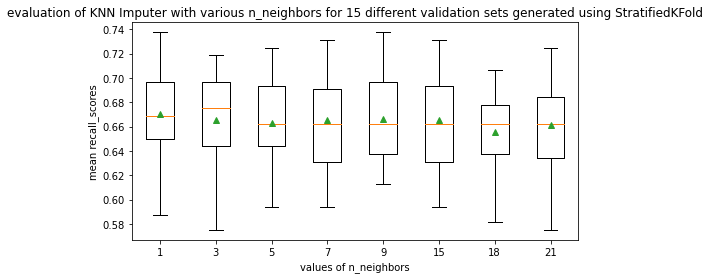

In [ ]:
# plot model performance for comparison
plt.figure(figsize=(8,4))
plt.boxplot(results, labels=n_neighbors, showmeans=True)
plt.title('evaluation of KNN Imputer with various n_neighbors for 15 different validation sets generated using StratifiedKFold')
plt.xlabel('values of n_neighbors')
plt.ylabel('mean recall_scores')
plt.show()

Obesrvations:
1. The mean recall scores for all the n_neighbors are very close to eachother.
2. Since we are dealing with the missing values, the imputed values must be conservative.
3. Hence we choose n_neighbor = 15 as it has highest standard deviation of recall scores.

In [ ]:
%%time
# Imputing the dataset with the conservative nearest neighbor k
knn_imp = KNNImputer(n_neighbors=15)
knn_imp.fit(X_train)
X_train_imp = knn_imp.transform(X_train)
X_cv_imp = knn_imp.transform(X_cv)
X_test_imp = knn_imp.transform(X_test)

CPU times: user 36min 20s, sys: 28.3 s, total: 36min 48s
Wall time: 35min 39s


In [ ]:
# import pickle
# with open('train_imp.pkl', 'wb') as tr:
#     pickle.dump(X_train_imp, tr)
# with open('test_imp.pkl', 'wb') as te:
#     pickle.dump(X_test_imp, te)
# with open('cv_imp.pkl', 'wb') as cv:
#     pickle.dump(X_cv_imp, cv)

In [21]:
import pickle
with open('train_imp.pkl', 'rb') as tr:
    X_train_imp=pickle.load(tr)

with open('test_imp.pkl', 'rb') as te:
    X_test_imp=pickle.load(te)
    
with open('cv_imp.pkl', 'rb') as cv:
    X_cv_imp=pickle.load(cv)

In [22]:
#lookin at the imputed values
X_train_imp_df = pd.DataFrame(X_train_imp, columns=X_train.columns)
X_train_imp_df.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,61990.0,7.720000e+02,578.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6560.0,...,452862.0,238318.0,589444.0,806720.0,502972.0,213364.0,20364.0,138.0,0.000000,0.0
1,53078.0,4.261419e+08,624.666667,24.533333,28.266667,0.0,0.0,0.0,29368.0,2459952.0,...,872890.0,259508.0,372842.0,288924.0,214724.0,251248.0,450.0,0.0,0.133333,0.0
2,28914.0,2.054000e+03,1872.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,37848.0,...,464158.0,143828.0,174690.0,125834.0,95102.0,56956.0,42822.0,78.0,0.000000,0.0
3,38724.0,2.880000e+02,228.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,56636.0,...,327972.0,139530.0,290932.0,339334.0,259082.0,148890.0,189622.0,4492.0,0.000000,0.0
4,181460.0,7.634000e+03,6034.000000,0.000000,0.000000,0.0,146928.0,1127254.0,4211790.0,7496468.0,...,2533312.0,624832.0,1295930.0,1552742.0,1203654.0,461352.0,24664.0,0.0,0.000000,0.0


In [42]:
#finding out the columns whose values are same i.e. the feature which does not have any variance at all
for feature in X_train_imp_df.columns:
  if (X_train_imp_df[feature] == X_train_imp_df[feature][0]).all():
    print("All values are equal in column", feature)

All values are equal in column cd_000


In [43]:
#removing the 0-variance feature
X_train_imp_df = X_train_imp_df.drop('cd_000', 1)

In [44]:
#https://machinelearningmastery.com/feature-selection-machine-learning-python/
#https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
#https://www.youtube.com/watch?v=2QeDRsxSF9M&list=PLDRsvGefgonmkLGDaKdh1z9zYbKCwee4u&index=2&t=1s

from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest(score_func=f_classif, k=10)
kbest.fit(X_train_imp_df, y_train)


best_select = np.argsort(kbest.scores_)   #F_statistic scores
best_features = list(X_train.columns[best_select[-10:]])
print('Selected features are ', best_features)

Selected features are  ['an_000', 'bj_000', 'aq_000', 'bt_000', 'aa_000', 'bb_000', 'cp_000', 'bu_000', 'bv_000', 'ch_000']


1. The scoring function used in the SelectKBest is f_classif.
2. First we will find out the sum of squared residuals around the mean of the data. TSS (total sum of squares)
3. Next, will find out the sum of squared residuals around the fit of the individual targets (here it is binary classification hence, two target variables)
4. F_statistic is defined as the ratio of variance explained by the dependend variables in the independent variable to the variance not explained.
5. After finding the F_statistic we will measure p-values.
6. With the help of p-values we will findout the features which are significant and which are not.

## Univariate Analysis 

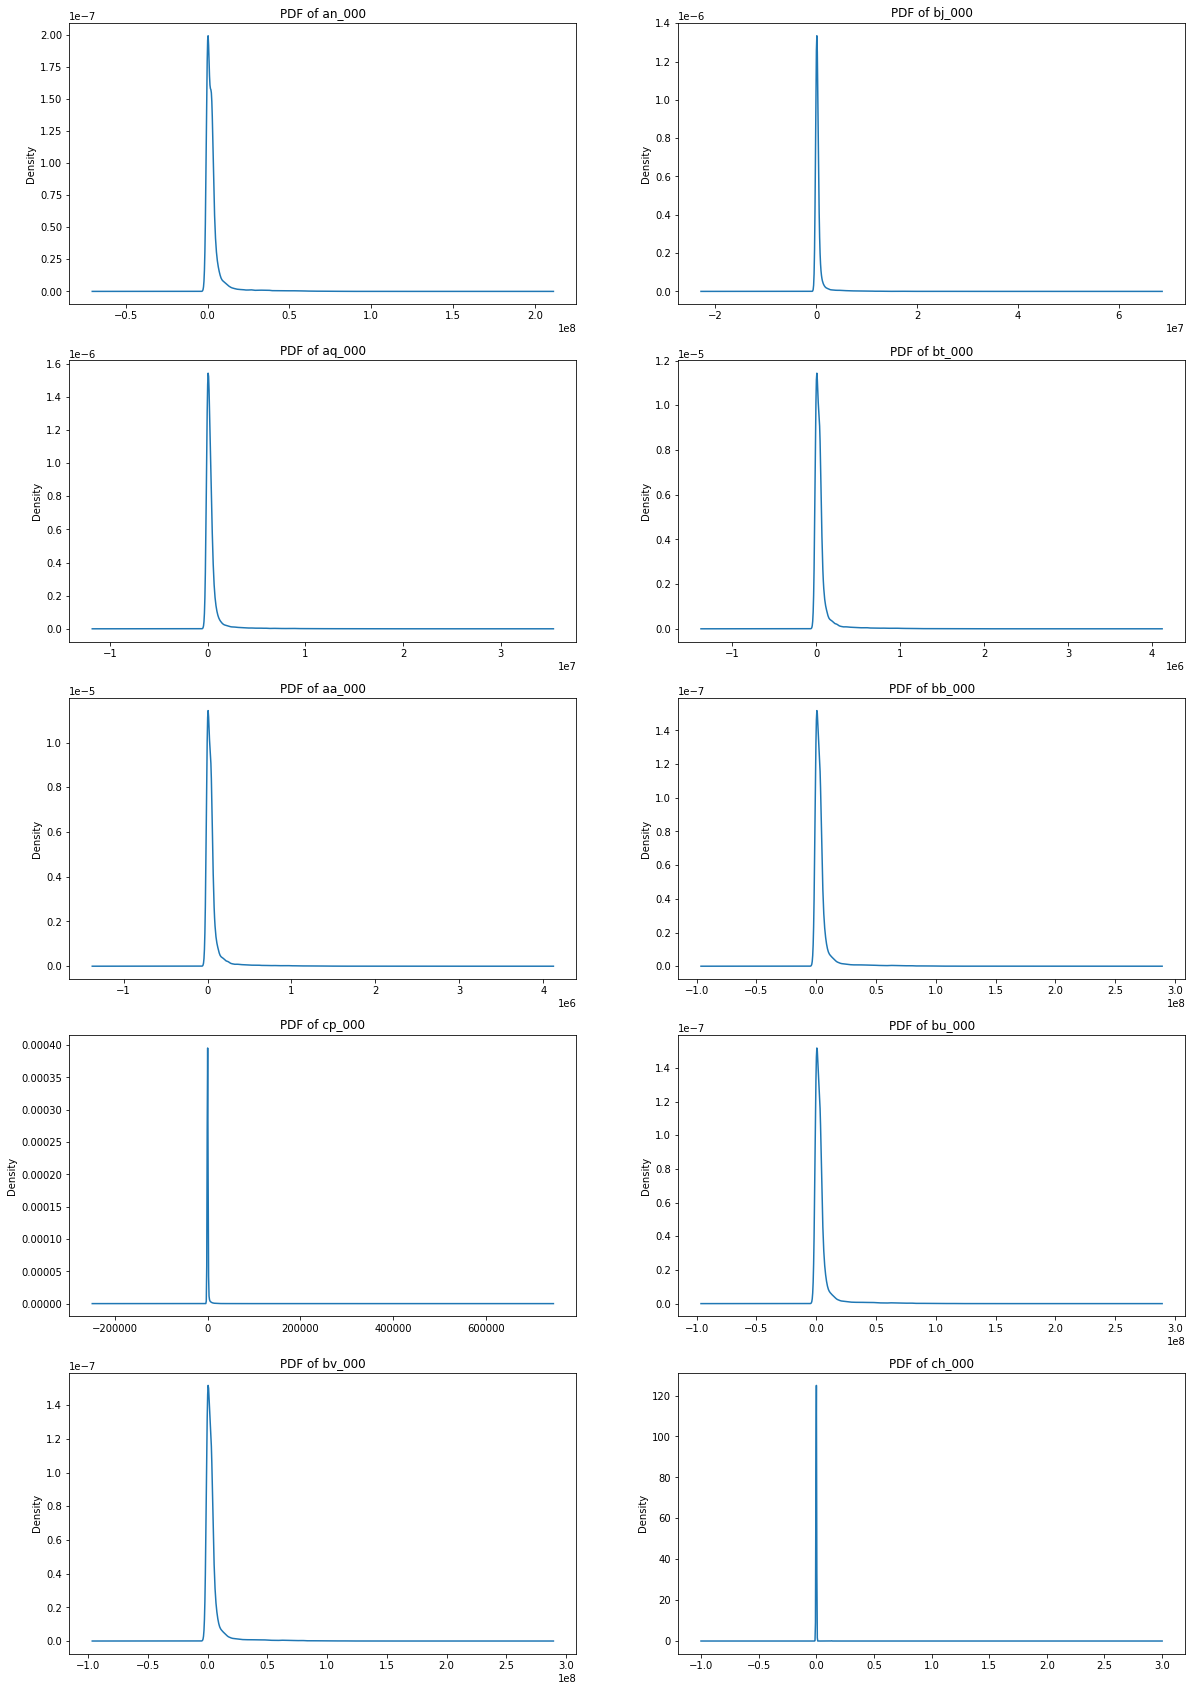

In [45]:
def pdf_plot(features):
    '''plots the Probability density function for a variable'''
    plt.figure(figsize = (20,30))
    num=1
    for feature in features:
        plt.subplot(5,2,num)
        num+=1
        X_train_imp_df[feature].plot.kde()
        plt.title('PDF of '+ str(feature))
    plt.show()
        
pdf_plot(best_features)

Observations:
1. above subplots are the probability density function of the best 10 features selected based f_classif.
2. for all the features the distribution is right skewed.
3. for all the features the maximum no of values can be found around 0.
4. for the features cp_000 and ch_000 we are not able to observe any variance at all

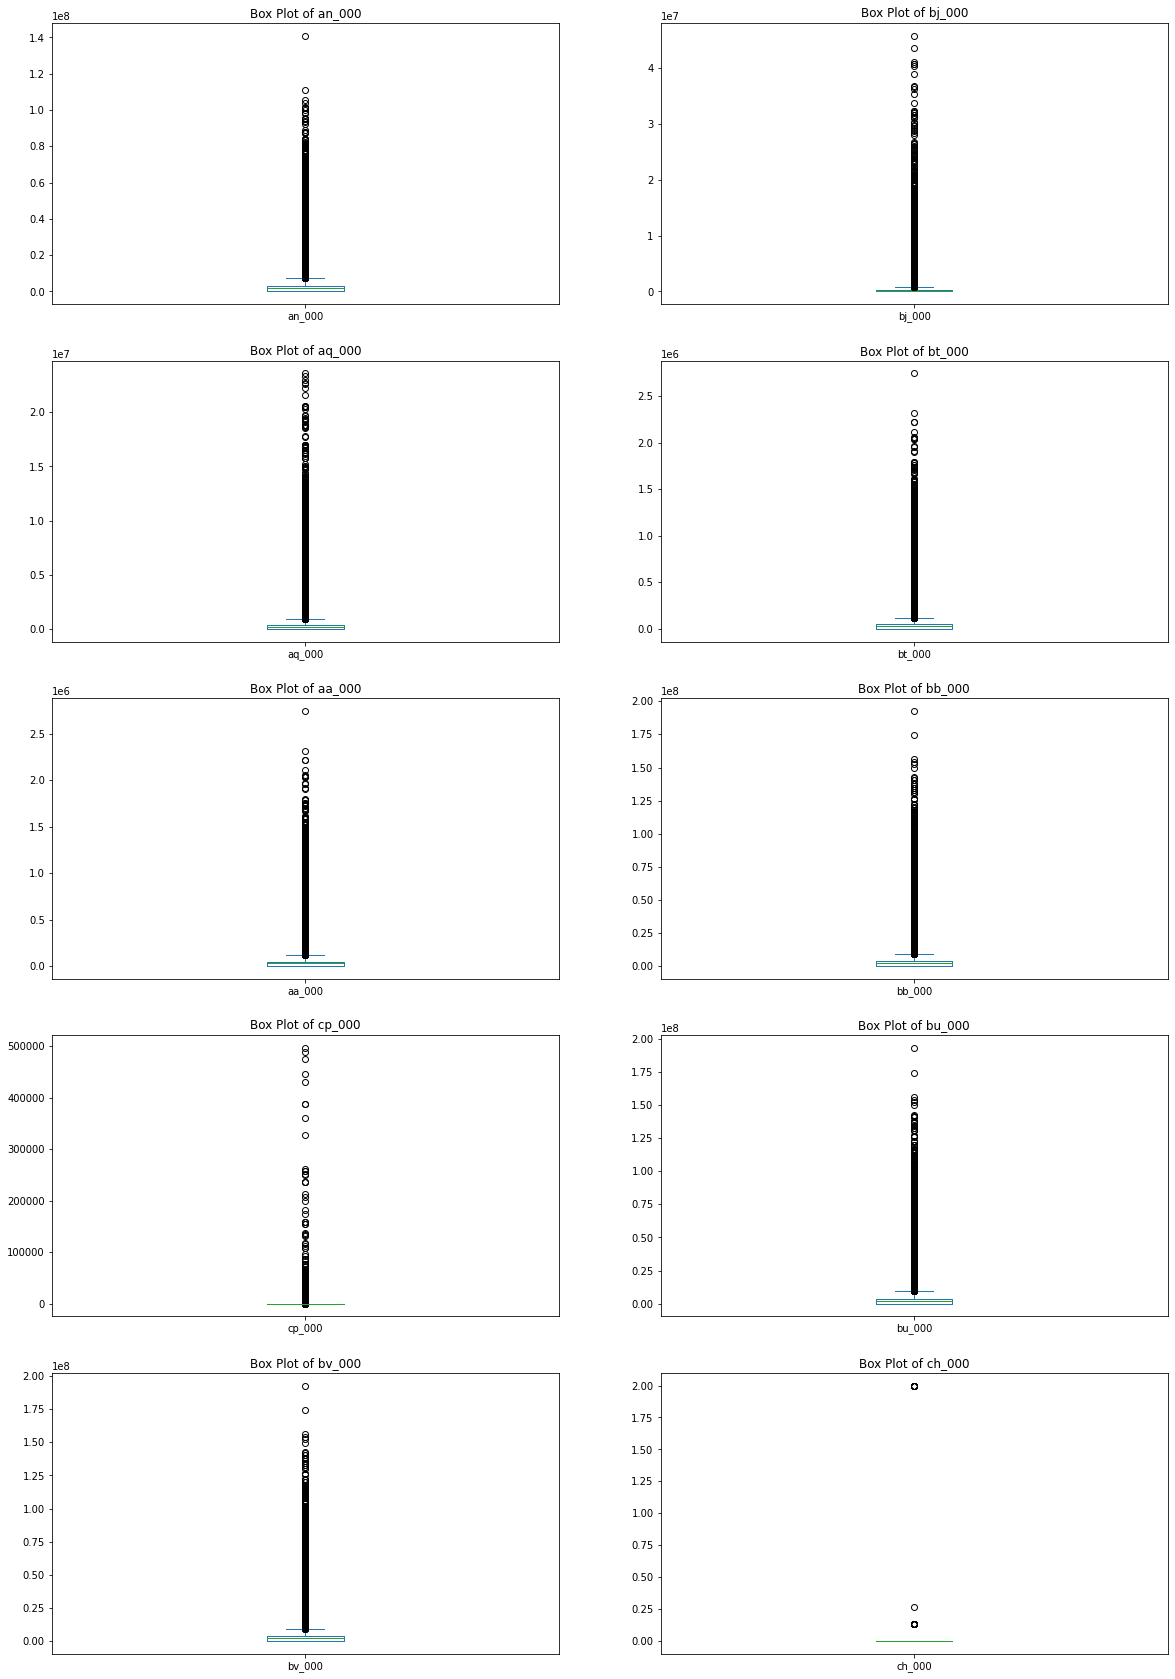

In [46]:
def box_plot(features):
    '''plots the Probability density function for a variable'''
    plt.figure(figsize = (20,30))
    num=1
    for feature in features:
        plt.subplot(5,2,num)
        num+=1
        X_train_imp_df[feature].plot.box()
        plt.title('Box Plot of '+ str(feature))
    plt.show()
        
box_plot(best_features)

Observations:
1. For all the features the median value is around 0.
2. Half of the values for all the features are appeared to be outliers.
3. For the features cp_000 and ch_000 the inter quartile box has vanished because of absence of enough variance.

## Multivariate analysis

In [47]:
best_features_df = X_train_imp_df[best_features[-5:]]
best_features_df['labels'] = y_train

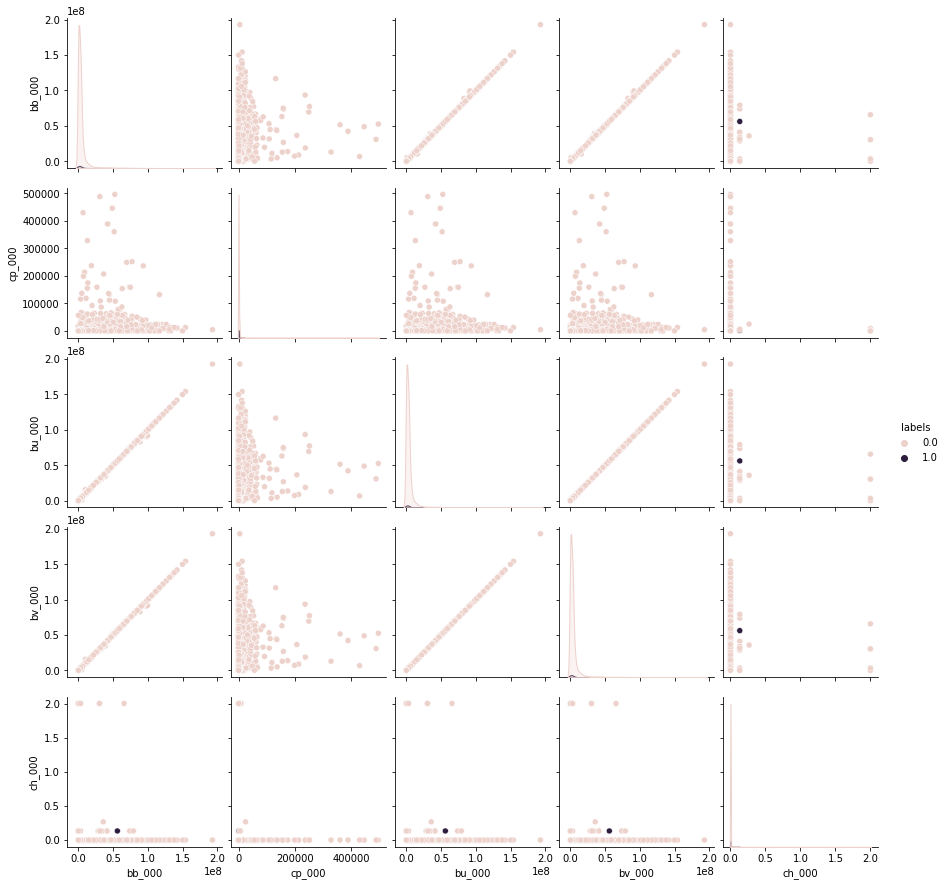

In [48]:
sns.pairplot(best_features_df, hue='labels')

Observations:
1. The diagonal kde plots for all the top five features are overlapping for both the classes.
2. If we obesrve the plots of 'bu_000' vs 'bb_000' and 'bv_oo' vs 'bb_000' and 'bu_000 vs 'bv_000' the trend is linear.
3. The plots of cp_000 with bu_000, bv_000, bb_000 are the only ones which are scattered over wide area.
4. If we compare the plots of ch_000 feature, the spread is very narrow.


### Standardizing the data for visualization analysis

In [ ]:
# standardizing data before performing dimensionality reductions techniques
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
X_train_std = std.fit_transform(X_train_imp)
X_cv_std = std.transform(X_cv_imp)
X_test_std = std.transform(X_test_imp)

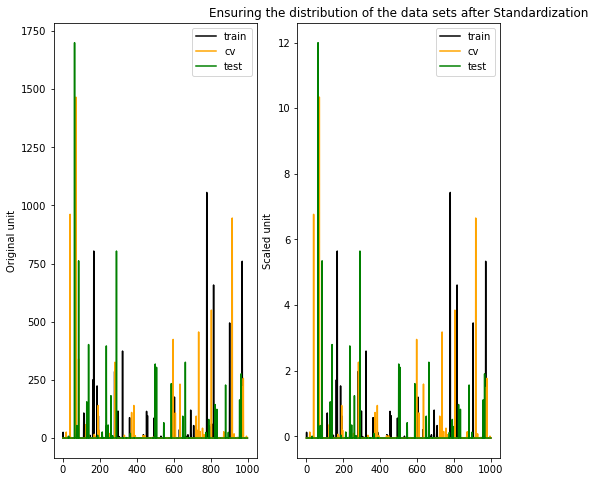

In [ ]:
#https://www.kaggle.com/an07kit/minimizing-total-cost-to-13250

X_train_scaled_head=X_train_std[0:1000,3]   #taking a sample of 1000 points with step=3 for plotting purpose
X_cv_scaled_head = X_cv_std[0:1000,3]
X_test_scaled_head=X_test_std[0:1000,3]

X_train_head=X_train_imp[0:1000,3]         #taking a sample of 1000 points with step=3 for plotting purpose
X_cv_head = X_cv_imp[0:1000,3]
X_test_head=X_test_imp[0:1000,3]

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(X_train_head,label='train', color='black')
plt.plot(X_cv_head, label='cv', color='orange')
plt.plot(X_test_head,label='test', color='green')
plt.legend(['train', 'cv', 'test'])
plt.ylabel('Original unit')
fig.add_subplot(1,2,2)
plt.plot(X_train_scaled_head,label='scaled_train', color='black')
plt.plot(X_cv_scaled_head, label='cv', color='orange')
plt.plot(X_test_scaled_head,label='scaled_test', color='green')
plt.legend(['train', 'cv', 'test'])
plt.ylabel('Scaled unit')
plt.title('Ensuring the distribution of the data sets after Standardization')
plt.show()

## TSNE data visualization

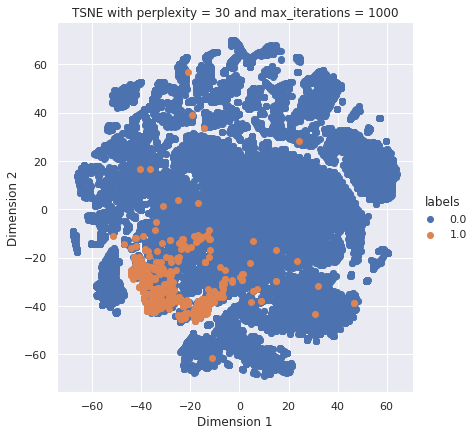

In [ ]:
from sklearn.manifold import TSNE

model_tsne = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

X_train_tsne = model_tsne.fit_transform(X_train_std)
tsne_data = np.vstack((X_train_tsne.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns = ['dim_1', 'dim_2', 'labels'])

sns.set(rc={'figure.figsize':(15, 15)})
sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter, 'dim_1', 'dim_2').add_legend()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('TSNE with perplexity = 30 and max_iterations = 1000')
plt.show()

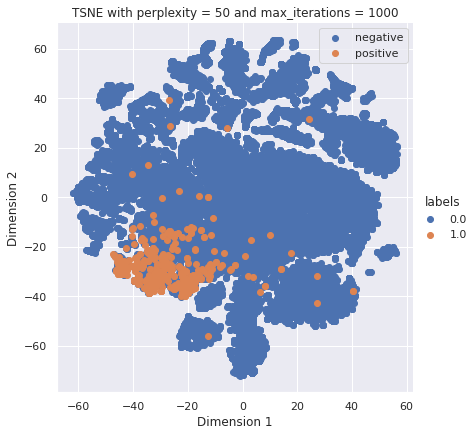

In [ ]:
model_tsne = TSNE(n_components=2, random_state=0, perplexity = 50, n_iter=1000)

X_train_tsne = model_tsne.fit_transform(X_train_std)
tsne_data = np.vstack((X_train_tsne.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns = ['dim_1', 'dim_2', 'labels'])

sns.set(rc={'figure.figsize':(15, 15)})
sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter, 'dim_1', 'dim_2').add_legend()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(['negative', 'positive'])
plt.title('TSNE with perplexity = 50 and max_iterations = 1000')
plt.show()

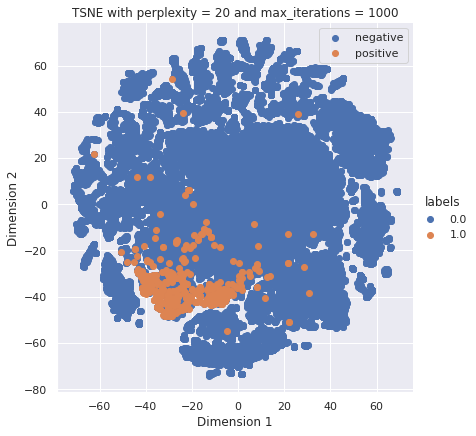

In [ ]:
model_tsne = TSNE(n_components=2, random_state=0, perplexity = 20, n_iter=1000)

X_train_tsne = model_tsne.fit_transform(X_train_std)
tsne_data = np.vstack((X_train_tsne.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns = ['dim_1', 'dim_2', 'labels'])

sns.set(rc={'figure.figsize':(15, 15)})
sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter, 'dim_1', 'dim_2').add_legend()
plt.title('TSNE with perplexity = 20 and max_iterations = 1000')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(['negative', 'positive'])
plt.show();

Observations:
1. The three TSNE plots seems to be stable.
2. All three contains closely clustered neighbourhoods of positive points.(Embedding the distance)
3. There are outliers surrounding the far away from the clustered neighbourhood. 
4. There is a greate overlap between positive and negative instances.

## PCA for visualization

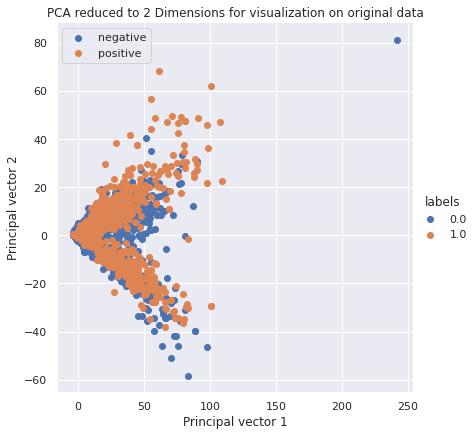

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)

pca_data = np.vstack((X_train_pca.T, y_train)).T
pca_df = pd.DataFrame(data=pca_data, columns = ['principle_1', 'principle_2', 'labels'])

sns.set(rc={'figure.figsize':(15, 15)})
sns.FacetGrid(pca_df, hue="labels", size=6).map(plt.scatter, 'principle_1', 'principle_2').add_legend()
plt.title('PCA reduced to 2 Dimensions for visualization on original data')
plt.xlabel('Principal vector 1')
plt.ylabel('Principal vector 2')
plt.legend(['negative', 'positive'])
plt.show()

Observations:
1. In the above plot the X and Y axis are top principle vectors of the training data where the maximum variance can be observed.
2. There is a lot of overlap between the both classes.
3. Positive class are way more spread out albeit being less no. of poisitve instances in the training data.

>#### Since the given data is higly imbalance i.e. for every positive instance there are 59 negative instance.
>#### This will lead any model biased towards negative class.
>#### To prevent this bias we oversample the training data with the help of imblearn package using SMOTE()
>#### SMOTE oversamples the minority class and undersamples the majority class
>#### The oversampling is based on kNN algorithm where k defines the neighborhood to generate the artificial samples

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=15, random_state = 5)
X_train_smote, y_train_smote = smote.fit_resample(X_train_std, y_train)

In [ ]:
y_train_smote.value_counts()

0    47200
1    47200
Name: class, dtype: int64

After the oversampling through SMOTE() the class labels are balanced.

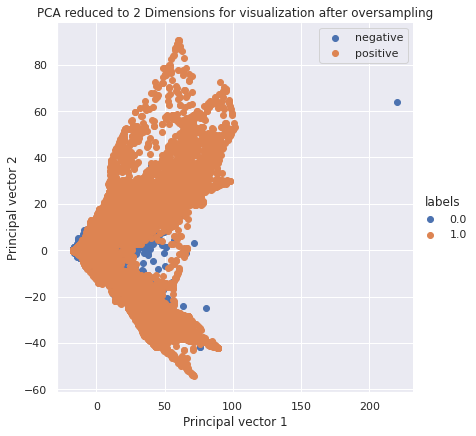

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_smote)

pca_data = np.vstack((X_train_pca.T, y_train_smote)).T
pca_df = pd.DataFrame(data=pca_data, columns = ['principle_1', 'principle_2', 'labels'])

sns.set(rc={'figure.figsize':(15, 15)})
sns.FacetGrid(pca_df, hue="labels", size=6).map(plt.scatter, 'principle_1', 'principle_2').add_legend()
plt.title('PCA reduced to 2 Dimensions for visualization after oversampling')
plt.xlabel('Principal vector 1')
plt.ylabel('Principal vector 2')
plt.legend(['negative', 'positive'])
plt.show()

Observations:
1. The positive class points are oversampled using SMOTE which generates artificial minority class instances using kNearestNeighbor.
2. Here, the oversampling helps to detect the outliers which are surrounded by artificial instances.

## PCA for variance analysis

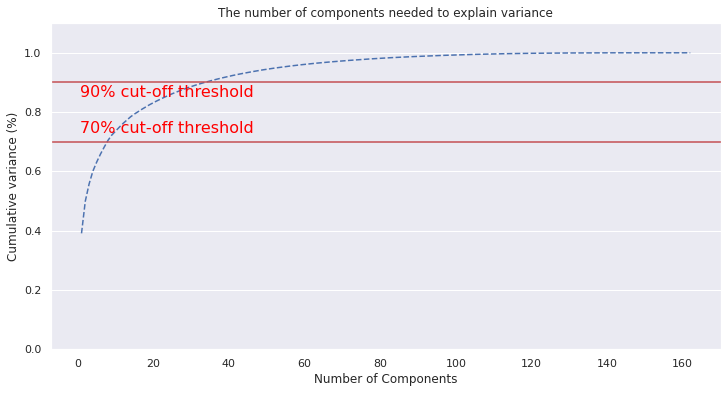

In [ ]:
#https://www.kaggle.com/an07kit/minimizing-total-cost-to-13250

pca_variance = PCA()
pca_var_data = pca_variance.fit_transform(X_train_smote)

plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 163, step=1)
y = np.cumsum(pca_variance.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.70, color='r', linestyle='-')
plt.text(0.5, 0.73, '70% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Observations:
1. When we plot the cumulative variance_explained by the eighen vectors, we can observe that 70% of the variance can be explained by 8 features and 90% of the variance can be explained by 34 features.
2. Reducing features in prediction decreases the bias of the model.

### Feature Engineering using PCA

### Credits: https://www.kaggle.com/an07kit/minimizing-total-cost-to-13250

In [ ]:
def pca_features(variance):
    pca = PCA(n_components=variance)
    pca.fit(X_train_smote)
    X_train_var = pca.transform(X_train_smote)
    X_cv_var = pca.transform(X_cv_std)
    X_test_var = pca.transform(X_test_std)
    print("Number of features after PCA = ", X_cv_var.shape[1])
    corrmat_pca = pd.DataFrame(X_train_var).corr()
    sns.heatmap(corrmat_pca, vmax=.8, square=True);
    plt.show()
    return X_train_var, X_cv_var, X_test_var

Number of features after PCA =  8


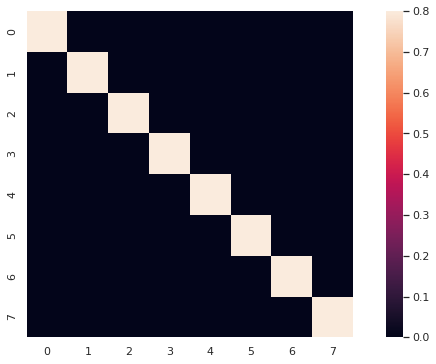

In [ ]:
X_train_70, X_cv_70, X_test_70 = pca_features(0.70)

Number of features after PCA =  16


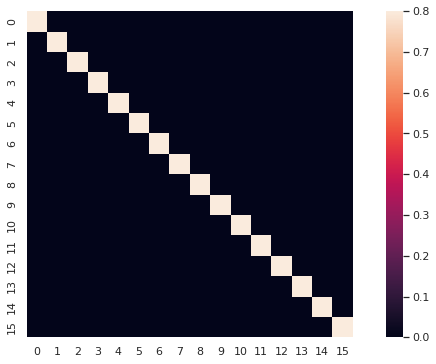

In [ ]:
X_train_80, X_cv_80, X_test_80 = pca_features(0.80)

Number of features after PCA =  34


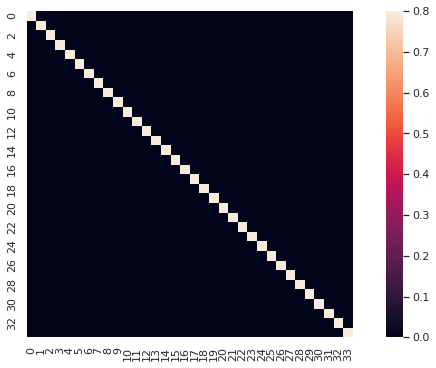

In [ ]:
X_train_90, X_cv_90, X_test_90 = pca_features(0.90)

### Performance metrics

In [ ]:
from sklearn.metrics import confusion_matrix

#Refered from the case study
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()
    return C

In [ ]:
def cost(array):
    '''For the given confusion matrix which contains TN, FP, FN, TP'''
    penalty_fn = 500
    penalty_fp = 10
    
    cost = penalty_fp*array[0][1] + penalty_fn*array[1][0]
    return cost

## Training of the model 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb

### Random Model

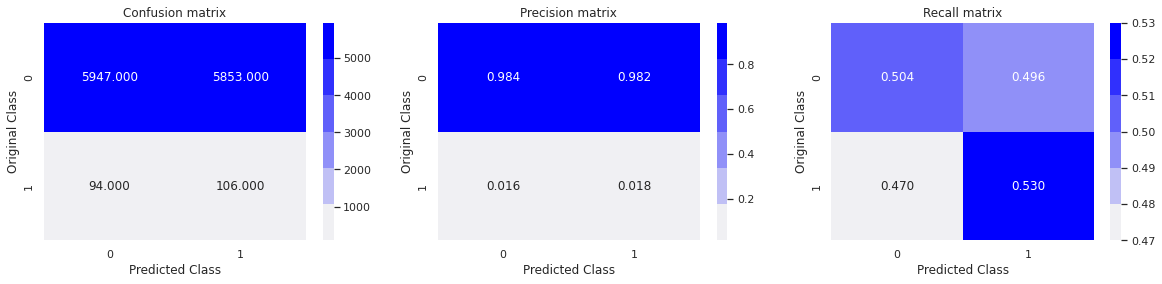

the cost of Random Model classifier is  105530


In [ ]:
y_cv_pred = np.zeros((len(X_cv),2))
np.random.seed(4)
for i in range(len(X_cv)):
    rand_probs = np.random.rand(1,2)
    y_cv_pred[i] = ((rand_probs/sum(sum(rand_probs)))[0])

predicted_y =np.argmax(y_cv_pred, axis=1)
random_confusion_matrix = plot_confusion_matrix(y_cv, predicted_y)
print('the cost of Random Model classifier is ', cost(random_confusion_matrix))

1. Since it is a random model, we have assigned the class labels for each instance in X_cv randomly using np.random.rand
2. In the confusion matrix of random model the values are splitted almost half among True an False classes

### kNN classification model

1. We are going to test which set of features are best suitable for modelling.
2. First let us try with all the imputed features.
3. consecutively try the 70%, 80% and 90% variance explained pca feautres.
4. At the end we are going to select the feature set which results in lowest cost metric and continue with all other models.

#### KNN on all the imputed featues set

In [ ]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors' : [3,5,7,9,11,13,15]}
classifier = GridSearchCV(estimator=knn, param_grid=parameters, scoring='recall', n_jobs=-1, cv=10)
classifier.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='recall')

In [ ]:
classifier.best_params_

{'n_neighbors': 3}

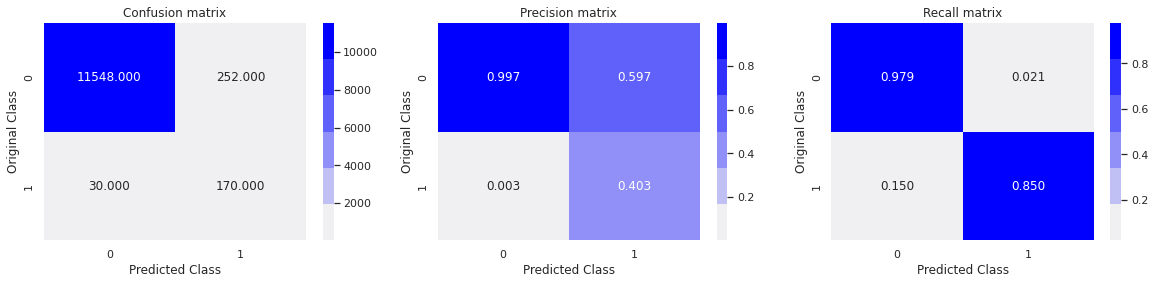

the cost of the kNN model when tuned to best recall_score is 17520


In [ ]:
#calibrating the model
sig_clf = CalibratedClassifierCV(classifier.best_estimator_, method='sigmoid', n_jobs=-1)
sig_clf.fit(X_train_smote, y_train_smote)

#evaluating the model
y_cv_pred =sig_clf.predict(X_cv_std)
cn_knn_all = plot_confusion_matrix(y_cv, y_cv_pred)
print('the cost of the kNN model for all the imputed feature set', cost(cn_knn_all))

#### KNN on 70% variance explained pca features

In [ ]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors' : [3,5,7,9,11,13,15]}
classifier = GridSearchCV(estimator=knn, param_grid=parameters, scoring='recall', n_jobs=-1, cv=10)
classifier.fit(X_train_70, y_train_smote)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='recall')

In [ ]:
classifier.best_params_

{'n_neighbors': 3}

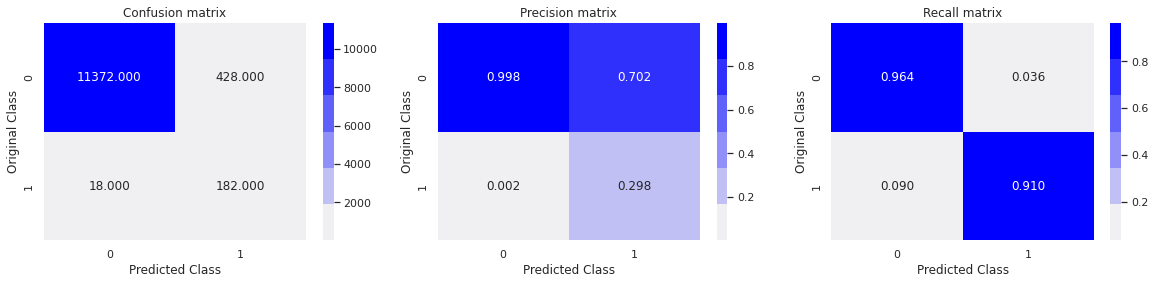

the cost of the kNN model for 70% variance explained pca feature set 13280


In [ ]:
#calibrating the model
sig_clf = CalibratedClassifierCV(classifier.best_estimator_, method='sigmoid', n_jobs=-1)
sig_clf.fit(X_train_70, y_train_smote)

#evaluating the model
y_cv_pred =sig_clf.predict(X_cv_70)
cn_knn_70 = plot_confusion_matrix(y_cv, y_cv_pred)
print('the cost of the kNN model for 70% variance explained pca feature set', cost(cn_knn_70))

#### KNN on 80% variance explained pca features

In [ ]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors' : [3,5,7,9,11,13,15]}
classifier = GridSearchCV(estimator=knn, param_grid=parameters, scoring='recall', n_jobs=-1, cv=10)
classifier.fit(X_train_80, y_train_smote)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='recall')

In [ ]:
classifier.best_params_

{'n_neighbors': 3}

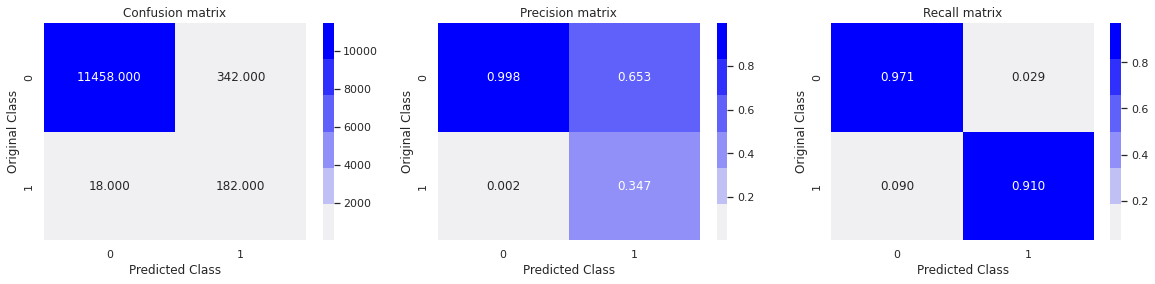

the cost of the kNN model for 80% variance explained pca feature set 12420


In [ ]:
#calibrating the model
sig_clf = CalibratedClassifierCV(classifier.best_estimator_, method='sigmoid', n_jobs=-1)
sig_clf.fit(X_train_80, y_train_smote)

#evaluating the model
y_cv_pred =sig_clf.predict(X_cv_80)
cn_knn_80 = plot_confusion_matrix(y_cv, y_cv_pred)
print('the cost of the kNN model for 80% variance explained pca feature set', cost(cn_knn_80))

#### KNN on 90% variance explained pca features

In [ ]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors' : [3,5,7,9,11,13,15]}
classifier = GridSearchCV(estimator=knn, param_grid=parameters, scoring='recall', n_jobs=-1, cv=10)
classifier.fit(X_train_90, y_train_smote)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='recall')

In [ ]:
classifier.best_params_

{'n_neighbors': 3}

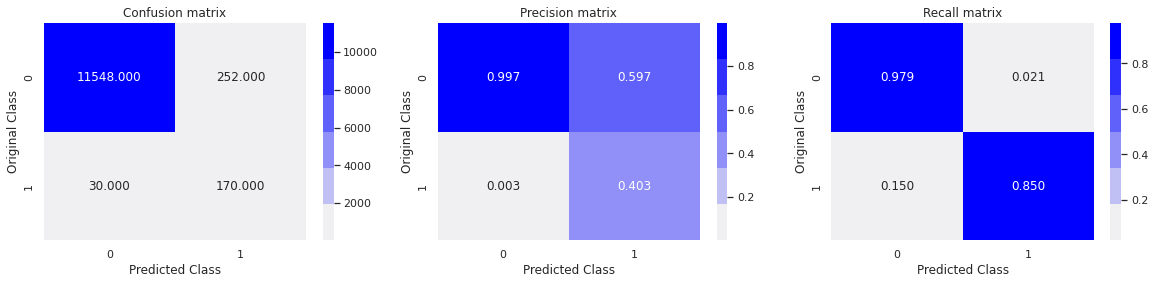

the cost of the kNN model for 90% variance explained pca feature set 17520


In [ ]:
#calibrating the model
sig_clf = CalibratedClassifierCV(classifier.best_estimator_, method='sigmoid', n_jobs=-1)
sig_clf.fit(X_train_90, y_train_smote)

#evaluating the model
y_cv_pred =sig_clf.predict(X_cv_90)
cn_knn_90 = plot_confusion_matrix(y_cv, y_cv_pred)
print('the cost of the kNN model for 90% variance explained pca feature set', cost(cn_knn_90))

Observations:
1. From the above four sets of features, 80% variance explained pca features has obtained lowest possible cost of 12420 with False Positives as 342 and False Negatives as 18. 
2. Hence we continue our modelling with 80% variance explained pca features

### Logistic Regression Classification Model

In [ ]:
lr = SGDClassifier(loss='log', random_state=8)
parameters = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1, 1, 10,  100,  1000]}
classifier = GridSearchCV(estimator=lr, param_grid=parameters, cv=10, n_jobs=-1, scoring='recall')
classifier.fit(X_train_80, y_train_smote)

GridSearchCV(cv=10, estimator=SGDClassifier(loss='log', random_state=8),
             n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000]},
             scoring='recall')

In [ ]:
classifier.best_params_

{'alpha': 0.01}

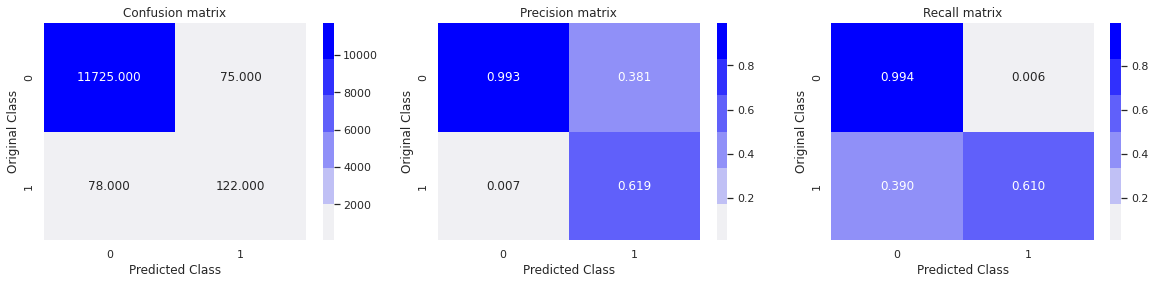

the cost of the Linear Regression model is 39750


In [ ]:
# calibrating the model
sig_clf = CalibratedClassifierCV(classifier.best_estimator_, method="sigmoid")
sig_clf.fit(X_train_80, y_train_smote)

#evaluating the model with Cross validation datas set
y_cv_pred = sig_clf.predict(X_cv_80)
cn_lr = plot_confusion_matrix(y_cv, y_cv_pred)
print('the cost of the Logistic Regression model is', cost(cn_lr))

Observations:
1. Being the linear model i.e. hyper plane decision boundary we can clearly observe that they failed to account the positive instances.
2. The cost of logistic regression is 39750 with 75 False Positives and 78 False Negatives.

### SVM classifier model

In [ ]:
svm = SGDClassifier(loss='hinge', random_state=2)
parameters = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1, 1, 10,  100,  1000]}
classifier = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, n_jobs=-1, scoring='recall')
classifier.fit(X_train_80, y_train_smote)

GridSearchCV(cv=10, estimator=SGDClassifier(random_state=2), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000]},
             scoring='recall')

In [ ]:
classifier.best_params_

{'alpha': 0.01}

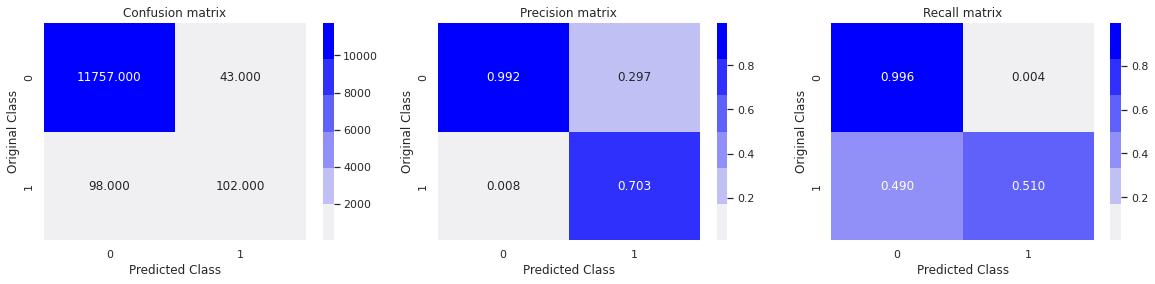

the cost of the SVM model is 49430


In [ ]:
sig_clf = CalibratedClassifierCV(classifier.best_estimator_, method="sigmoid")
sig_clf.fit(X_train_80, y_train_smote)

#evaluating the model with Cross Validation Data set
y_cv_pred = sig_clf.predict(X_cv_80)
cn_svm = plot_confusion_matrix(y_cv, y_cv_pred)
print('the cost of the SVM model is', cost(cn_svm))

Observations:
1. The same drawback of hyper plane decision boundary can be observed here too. The minimization hingeloss tries to maximize the distance the between two classes such that the probability of determining an instance increases.
2. This margin maximization between linear surfaces may have caused to increase the misclassification of Positive instances relative to linear regression.
3. The cost of the linear SVM model is 49430 which comprises of 43 False Positives and 98 False Negatives.

### RandomForrest Classifier

In [ ]:
%%time
rf = RandomForestClassifier()
parameters = {'n_estimators' : [300, 350, 400, 450], 'min_samples_leaf':[2,3,5,7], 'max_depth':[4,5,6,7]}
classifier = GridSearchCV(estimator=rf, param_grid=parameters, cv=10, n_jobs=-1, scoring='recall')
classifier.fit(X_train_80, y_train_smote)

CPU times: user 1min 43s, sys: 743 ms, total: 1min 44s
Wall time: 2h 38min 45s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'min_samples_leaf': [2, 3, 5, 7],
                         'n_estimators': [300, 350, 400, 450]},
             scoring='recall')

In [ ]:
classifier.best_params_

{'max_depth': 7, 'min_samples_leaf': 3, 'n_estimators': 350}

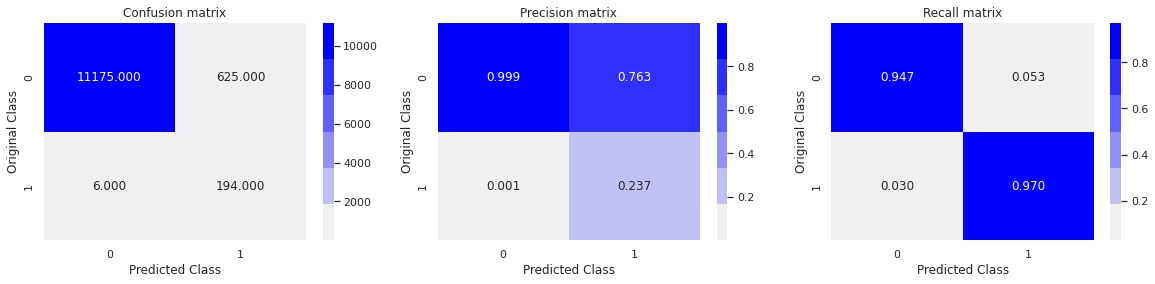

the cost of the Random Forrest model is 9250


In [ ]:
# calibrating the model
sig_clf = CalibratedClassifierCV(classifier.best_estimator_, method="sigmoid")
sig_clf.fit(X_train_80, y_train_smote)

# evaluating the model
y_cv_pred = sig_clf.predict(X_cv_80)
cn_rf = plot_confusion_matrix(y_cv, y_cv_pred)
print('the cost of the Random Forrest model is', cost(cn_rf))

1. After hypertuning the Random Forrest Model using GridSearchCV with no. of base tree estimators and minimum no. of samples required to split at the node and max_depth of the tree to avoid overfitting we have got best recall score at max_depth = 7, min_samples_leaf=3, n_estimators=350.
2. After predicting the cost of the Random Forrest Classifier is 9250 with 6 False Negative and 625 False Positives.
3. The ensemble of high variance Decision Trees seems to indentify the positve class much more accurately with the use of instance sampling with replacement  and majority vote.

### XGBoost Implementaion of Gradient Boosting

In [ ]:
%%time
xgbc= xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', eval_metric='auc', use_label_encoder=False)
parameters = {'gamma': [0.1, 0.5, 1, 5, 10],
              'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1,],
              'max_depth': [1,2,3,4],
              'n_estimators': [350, 400, 450, 500],
              'reg_alpha': [0.01, 0.1, 1, 10,  100,  1000],
              'reg_lambda': [0.01, 0.1, 1, 10,  100,  1000]}

classifier = RandomizedSearchCV(estimator=xgbc, param_distributions=parameters, cv=5, n_jobs=-1, 
                                scoring='recall', n_iter=15)
classifier.fit(X_train_80, y_train_smote)

CPU times: user 3min 1s, sys: 469 ms, total: 3min 1s
Wall time: 1h 22min 30s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='auc', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=na...
                                           subsample=None, tree_method=None,
                                           use_label_encoder=False,
                                    

In [ ]:
classifier.best_params_

{'reg_lambda': 10,
 'reg_alpha': 1,
 'n_estimators': 350,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 5}

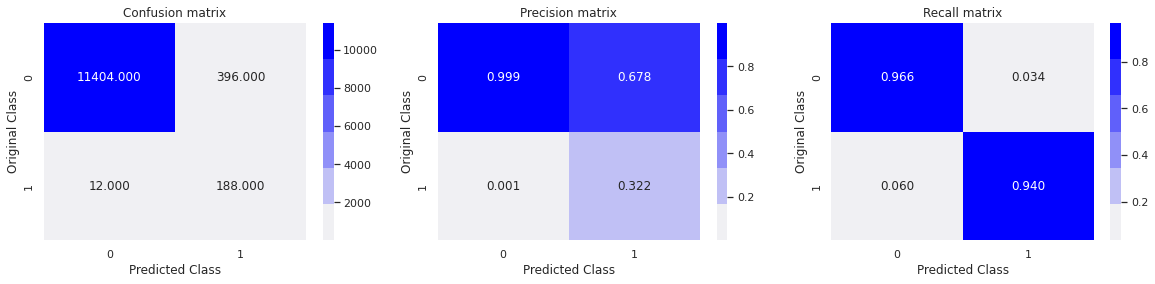

the cost of the Gradient Boosting Decision Tree model is 9960


In [ ]:
# calibrating the model
sig_clf = CalibratedClassifierCV(classifier.best_estimator_, method="sigmoid")
sig_clf.fit(X_train_80, y_train_smote)

# evaluating the model
y_cv_pred = sig_clf.predict(X_cv_80)
cn_xgb = plot_confusion_matrix(y_cv, y_cv_pred)
print('the cost of the Gradient Boosting Decision Tree model is', cost(cn_xgb))

Observations:
1. Compared to RandomForest Classifier i.e. Bagging ensemble XGBoost Classifier i.e. Boosting ensemble predicts  both negative instances along with positive instances more accurately.
2. The minimization of bias seems to give importance to negative class hence the False Positive of XGBoost way more lower than the False Positive of RandomForest Classifier.
3. At the end the cost of GBDT is little bit higher than the RandomForest Classifier i.e 9960 which comprises of 396 False Positives and 12 False Negatives

### Support Vector Machine with Radial Bias kernalization

In [ ]:
%%time
svc  = SVC()
parameters = {'C': [8, 10, 12, 14],
              'gamma': [0.004, 0.008, 0.01, 0.03, 0.06],
              'kernel': ['rbf']}
classifier = RandomizedSearchCV(estimator=svc, param_distributions=parameters, cv=3, n_jobs=-1, scoring='recall', n_iter=10)
classifier.fit(X_train_80, y_train_smote)

CPU times: user 9min 27s, sys: 585 ms, total: 9min 28s
Wall time: 31min 18s


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [8, 10, 12, 14],
                                        'gamma': [0.004, 0.008, 0.01, 0.03,
                                                  0.06],
                                        'kernel': ['rbf']},
                   scoring='recall')

In [ ]:
classifier.best_params_

{'kernel': 'rbf', 'gamma': 0.06, 'C': 10}

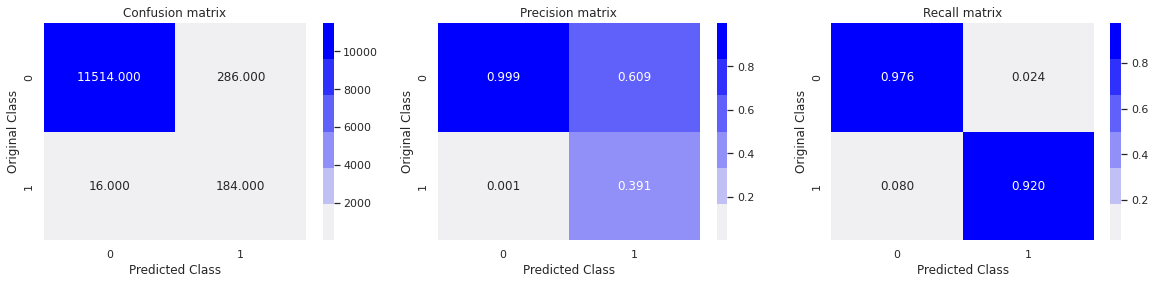

the cost of the support vector machines of RBF kernel model is 10860


In [ ]:
# calibrating the model
sig_clf = CalibratedClassifierCV(classifier.best_estimator_, method="sigmoid")
sig_clf.fit(X_train_80, y_train_smote)

# evaluating the model
y_cv_pred = sig_clf.predict(X_cv_80)
cn_rbf = plot_confusion_matrix(y_cv, y_cv_pred)
print('the cost of the support vector machines of RBF kernel model is', cost(cn_rbf))

Observations:
1. The RBF kernel which is non linear SVM fare better compare to the linear SVM.
2. The RBF kernel has been successfull in identifying the positive class hence it results in low cost than linear SVM.
3. The costo RBF kernel SVM is 10860 which comprises of 286 False Positives and 16 False Negatives.

### Extremely Randomized Tree classifier

In [ ]:
%%time
ert = ExtraTreesClassifier()
parameters = {'n_estimators' : [300, 350, 400, 450], 'min_samples_leaf':[3,5,7], 'max_depth':[3, 5, 7, 12]}
classifier = GridSearchCV(estimator=ert, param_grid=parameters, cv=10, n_jobs=-1, scoring='recall')
classifier.fit(X_train_80, y_train_smote)

CPU times: user 14.7 s, sys: 366 ms, total: 15.1 s
Wall time: 20min 46s


GridSearchCV(cv=10, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 12],
                         'min_samples_leaf': [3, 5, 7],
                         'n_estimators': [300, 350, 400, 450]},
             scoring='recall')

In [ ]:
classifier.best_params_

{'max_depth': 12, 'min_samples_leaf': 3, 'n_estimators': 300}

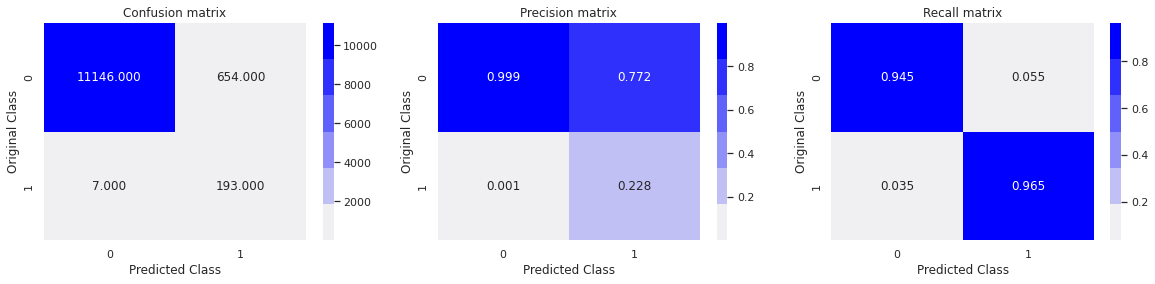

the cost of the Extremely Random Tree model is 10040


In [ ]:
#calibrating the model
sig_clf = CalibratedClassifierCV(classifier.best_estimator_, method="sigmoid")
sig_clf.fit(X_train_80, y_train_smote)

# evaluating the model
y_cv_pred = sig_clf.predict(X_cv_80)
cn_ert = plot_confusion_matrix(y_cv, y_cv_pred)
print('the cost of the Extremely Random Tree model is', cost(cn_ert))

Observations
1. Extremely Randomized Trees find out the best value of Tau for numerical feature by sampling randomly to findout the weighted entropy.
2. This weighted entropy is used to find out the Information Gain for every numerical feature.
3. Hence, they are faster in training relative to Random Forest Classifier.
4. The cost of Extremely Randomized Trees is 10040 which is slightly higher may be due to approximation along with 654 False Positives and 7 False Negatives.

In [ ]:
import prettytable
from prettytable import PrettyTable
TB = PrettyTable()

TB.title = "The cost of the various models fitted to the oversampled data using SMOTE and 80% variance explained pca features"
TB.field_names = ['MODEL', 'DESCRIPTION', 'False Negatives', 'False Positives', 'COST']
TB.add_row(['RANDOM', 'ARBITRARY', 94, 5853, 105530])
TB.add_row(['SVM-LINEAR', 'LINEAR', 98, 43, 49430])
TB.add_row(['LOGISTIC REGRESSION', 'LINEAR', 78, 75, 39750])
TB.add_row(['kNN', 'NEAREST NEIGHBOR', 18, 342, 12420])
TB.add_row(['SVM-RBF', 'NON-LINEAR', 16, 286, 10860])
TB.add_row(['EXTREMELY RANDOMIZED TREE', 'ENSEMBLE', 7, 654, 10040])
TB.add_row(['XG BOOST', 'ENSEMBLE', 12, 396, 9960])
TB.add_row(['RANDOM FORREST', 'ENSEMBLE', 6, 625, 9250])

print(TB)

+---------------------------------------------------------------------------------------------------------------------+
|  The cost of the various models fitted to the oversampled data using SMOTE and 80% variance explained pca features  |
+-----------------------------------+------------------------+----------------------+----------------------+----------+
|               MODEL               |      DESCRIPTION       |   False Negatives    |   False Positives    |   COST   |
+-----------------------------------+------------------------+----------------------+----------------------+----------+
|               RANDOM              |       ARBITRARY        |          94          |         5853         |  105530  |
|             SVM-LINEAR            |         LINEAR         |          98          |          43          |  49430   |
|        LOGISTIC REGRESSION        |         LINEAR         |          78          |          75          |  39750   |
|                kNN                |   

Final Conclusions:

1. The Ensemble Techniques along with non-linear decision boundary models tends to fare better for identifying the positive class.
2. The main business constraint is to reduce the no. of False Negatives i.e. Predicting the actual positive as negative. 
3. This can be achieved through Random Forrest Classifier.
4. There is no low latency constraint cause the inspection of trucks are generally a meticulous procedure.